<a href="https://colab.research.google.com/github/anash18/4105-HW-Nash/blob/main/ECGR_4105_Final_Project_Pytorch/Classical/Classical_Dataset_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/4105 Final Project/Datasets/heart_2.csv'
heart_attack = pd.DataFrame(pd.read_csv(file_path))
heart_attack.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Defining mapping function to map multiple inputs of the dataset
def gender_map(x):
    return x.map({'M': 1, 'F': 0})

def chestPain_map(x):
    return x.map({'TA': 1, 'ATA' : 2, 'NAP' : 3, 'ASY' : 4})

def restigECG_map(x):
    return x.map({'Normal' : 0, 'ST' : 1, 'LVH' : 2})

def exerAng_map(x):
    return x.map({'N' : 0, 'Y' : 1})

def stSlope_map(x):
    return x.map({'Up' : 1, 'Flat' : 2, 'Down' : 3})

In [ ]:
heart_attack['Sex'] = heart_attack[['Sex']].apply(gender_map)
heart_attack['ChestPainType'] = heart_attack[['ChestPainType']].apply(chestPain_map)
heart_attack['RestingECG'] = heart_attack[['RestingECG']].apply(restigECG_map)
heart_attack['ExerciseAngina'] = heart_attack[['ExerciseAngina']].apply(exerAng_map)
heart_attack['ST_Slope'] = heart_attack[['ST_Slope']].apply(stSlope_map)

In [ ]:
unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique_cp = heart_attack['ChestPainType'].unique()
print(unique_cp)
unique_restEcg = heart_attack['RestingECG'].unique()
print(unique_restEcg)
unique_exAng = heart_attack['ExerciseAngina'].unique()
print(unique_exAng)
unique_stSlope = heart_attack['ST_Slope'].unique()
print(unique_stSlope)


# Check for NaN values in columns after fillna operations
columns_with_nulls = heart_attack.columns[heart_attack.isnull().any()].tolist()
print("Columns with NaN values after fillna operations:")
print(columns_with_nulls)

heart_attack.head()

[1 0]
[2 3 4 1]
[0 1 2]
[0 1]
[1 2 3]
Columns with NaN values after fillna operations:
[]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# Extract features and target
X = heart_attack[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR',
                  'ExerciseAngina', 'Oldpeak', 'ST_Slope']].values
y = heart_attack['HeartDisease'].values.reshape(-1, 1)


In [ ]:
# Normalize data using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Add intercept term to features
X_train_1 = np.hstack((np.ones((len(X_train), 1)), X_train))
X_test_1 = np.hstack((np.ones((len(X_test), 1)), X_test))

# Initialize linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train_1, y_train)

# Get predictions
y_linear_pred = linear_model.predict(X_test_1)

# Calculate metrics for linear regression
linear_mse = mean_squared_error(y_test, y_linear_pred)
r2_score = linear_model.score(X_test_1, y_test)


print('Linear Regression Metrics:')
print(f'Mean Squared Error (MSE): {linear_mse:.2f}')
print(f'R-squared (R2): {r2_score:.2f}')

Linear Regression Metrics:
Mean Squared Error (MSE): 0.13
R-squared (R2): 0.47


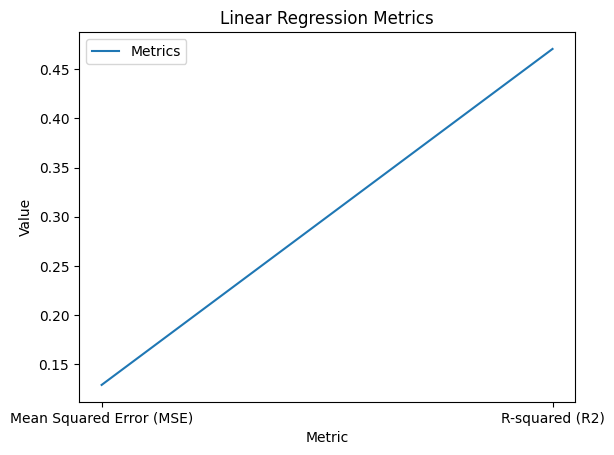

In [ ]:
# Plotting data
fig, ax = plt.subplots()
ax.plot(['Mean Squared Error (MSE)', 'R-squared (R2)'], [linear_mse, r2_score])

ax.legend(['Metrics'])
ax.set_title('Linear Regression Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

plt.show()

In [ ]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=0)

# Fit the model
logreg_model.fit(X_train, y_train)

# Predictions for Logistic Regression
y_pred = logreg_model.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('\nLogistic Regression Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix for Logistic Regression:')


Logistic Regression Metrics:
Accuracy: 0.84
Precision: 0.85
Recall: 0.88
F1 Score: 0.86

Confusion Matrix for Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


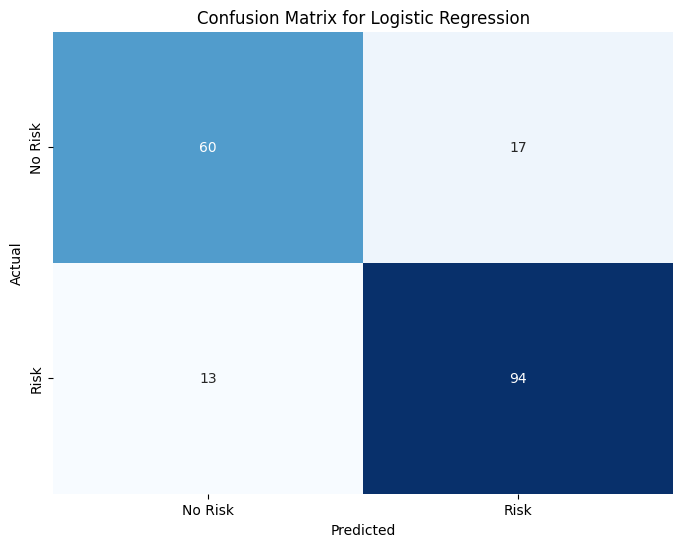

In [ ]:
# Confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train_1, y_train)

# Predictions for Gaussian Naive Bayes
y_nb_pred = nb_model.predict(X_test_1)

# Calculate metrics for Gaussian Naive Bayes
nb_accuracy = accuracy_score(y_test, y_nb_pred)
nb_precision = precision_score(y_test, y_nb_pred)
nb_recall = recall_score(y_test, y_nb_pred)
nb_f1 = f1_score(y_test, y_nb_pred)

print('\nGaussian Naive Bayes Metrics:')
print(f'Accuracy: {nb_accuracy:.2f}')
print(f'Precision: {nb_precision:.2f}')
print(f'Recall: {nb_recall:.2f}')
print(f'F1 Score: {nb_f1:.2f}')
print('\nConfusion Matrix for Gaussian Naive Bayes:')


Gaussian Naive Bayes Metrics:
Accuracy: 0.83
Precision: 0.85
Recall: 0.86
F1 Score: 0.86

Confusion Matrix for Gaussian Naive Bayes:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


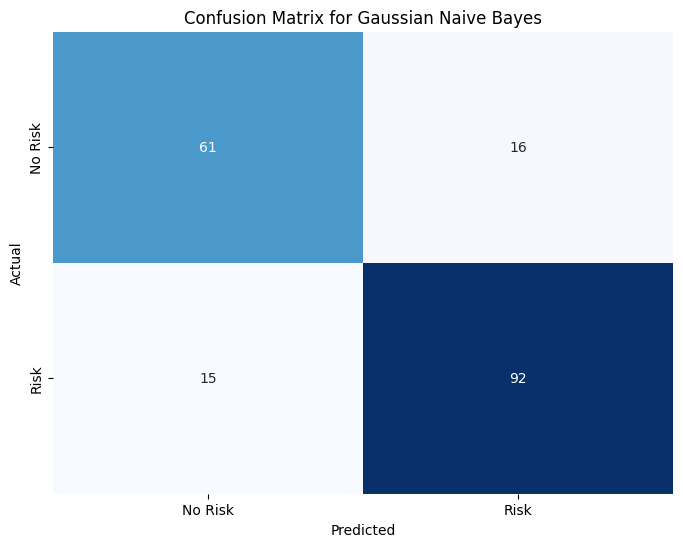

In [ ]:

# Confusion matrix for Gaussian Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, y_nb_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
clf = SVC()
clf.fit(X_train_1, y_train)
y_pred_svm = clf.predict(X_test_1)
svm_accuracy = metrics.accuracy_score(y_test,y_pred_svm)
svm_precision = metrics.precision_score(y_test,y_pred_svm)
svm_recall = metrics.recall_score(y_test,y_pred_svm)
svm_f1 = metrics.f1_score(y_test,y_pred_svm)
print('\nGaussian Naive Bayes Metrics:')
print(f'Accuracy: {svm_accuracy:.2f}')
print(f'Precision: {svm_precision:.2f}')
print(f'Recall: {svm_recall:.2f}')
print(f'F1 Score: {svm_f1:.2f}')


Gaussian Naive Bayes Metrics:
Accuracy: 0.85
Precision: 0.86
Recall: 0.90
F1 Score: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
